#Part 1: Heart Disease Prediction Dataset (30 Pts)

##Q1: Exploratory Data Analysis (5 Pts)
Get familiar with the dataset by exploring the different features, their distribution, and the labels. Check for common pitfalls like missing or nonsensical data, unusual feature distribution, outliers, or class imbalance, and describe how to handle them. After having familiarized yourself with the data, explain how you preprocess the dataset for the remaining tasks of part 1. Interpretability
     
and explainability aim at gaining more insights about the data than just optimizing predictive performance. A first simple step is to have a look at the (linear) dependencies of the variables. Visualize the pairwise correlation matrix and describe which features seem to be important for predicting the label.


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gc

In [26]:
!git clone https://github.com/hestquest/MLHC.git
#kaggle datasets download -d fedesoriano/heart-failure-prediction

fatal: destination path 'MLHC' already exists and is not an empty directory.


In [27]:
test_split = pd.read_csv("/content/MLHC/heart_failure_data/test_split.csv")
train_val_split = pd.read_csv("/content/MLHC/heart_failure_data/test_split.csv")

In [28]:
print(test_split.shape)
display(test_split.head())
print(train_val_split.shape)
display(train_val_split.head())

(184, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1
1,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1
2,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
3,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
4,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1


(184, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1
1,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1
2,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
3,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
4,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1


In [29]:
print(train_val_split.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [30]:
display(train_val_split.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             184 non-null    int64  
 1   Sex             184 non-null    object 
 2   ChestPainType   184 non-null    object 
 3   RestingBP       184 non-null    int64  
 4   Cholesterol     184 non-null    int64  
 5   FastingBS       184 non-null    int64  
 6   RestingECG      184 non-null    object 
 7   MaxHR           184 non-null    int64  
 8   ExerciseAngina  184 non-null    object 
 9   Oldpeak         184 non-null    float64
 10  ST_Slope        184 non-null    object 
 11  HeartDisease    184 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 17.4+ KB


None

In [31]:
display(train_val_split.describe())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.461957,133.728261,203.630435,0.233696,139.369565,0.940761,0.597826
std,9.504021,18.080333,111.152602,0.424335,25.867344,1.002740,0.491675
min,28.000000,92.000000,0.000000,0.000000,71.000000,-2.600000,0.000000
25%,48.000000,120.000000,176.750000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,1.000000,1.000000
75%,60.000000,145.250000,265.250000,0.000000,160.000000,1.600000,1.000000
max,75.000000,200.000000,603.000000,1.000000,202.000000,4.000000,1.000000


In [32]:
#Resting BP is 0 sometimes, same for Cholesterol
print(train_val_split[train_val_split["RestingBP"]==0])
def replacebymean(data):
  #Replace weird values by mean
  BP_mean = data["RestingBP"].mean()
  data["RestingBP"].replace(0, BP_mean, inplace=True)
  #same for Cholesterol
  Chol_mean = data["Cholesterol"].mean()
  data["Cholesterol"].replace(0, Chol_mean, inplace=True)

replacebymean(train_val_split)
replacebymean(test_split)
train_val_split.describe()
test_split.describe()

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.461957,133.728261,237.937736,0.233696,139.369565,0.940761,0.597826
std,9.504021,18.080333,64.399477,0.424335,25.867344,1.002740,0.491675
min,28.000000,92.000000,100.000000,0.000000,71.000000,-2.600000,0.000000
25%,48.000000,120.000000,203.630435,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,140.000000,1.000000,1.000000
75%,60.000000,145.250000,265.250000,0.000000,160.000000,1.600000,1.000000
max,75.000000,200.000000,603.000000,1.000000,202.000000,4.000000,1.000000


In [33]:
def numberify(data):
  #Turned all categorical columns into ordinal(gave each category a value) -> Male(1), Female(0) etc
  for i in data.columns:
        if data[i].dtype == 'object' or data[i].dtype == 'bool': #turn object/string into categorical
              data[i] = pd.Categorical(data[i])
              data[i] = data[i].cat.codes
  display(data)
numberify(train_val_split)
numberify(test_split)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,1,0,145,282.000000,0,0,142,1,2.8,1,1
1,57,1,0,160,203.630435,1,1,98,1,2.0,1,1
2,62,0,0,150,244.000000,0,1,154,1,1.4,1,1
3,59,1,0,164,176.000000,1,0,90,0,1.0,1,1
4,57,1,0,128,203.630435,1,2,148,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,140,192.000000,0,1,148,0,0.4,1,0
180,52,1,1,120,284.000000,0,1,118,0,0.0,2,0
181,38,1,2,138,175.000000,0,1,173,0,0.0,2,0
182,48,1,0,130,256.000000,1,0,150,1,0.0,2,1


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,1,0,145,282.000000,0,0,142,1,2.8,1,1
1,57,1,0,160,203.630435,1,1,98,1,2.0,1,1
2,62,0,0,150,244.000000,0,1,154,1,1.4,1,1
3,59,1,0,164,176.000000,1,0,90,0,1.0,1,1
4,57,1,0,128,203.630435,1,2,148,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,1,0,140,192.000000,0,1,148,0,0.4,1,0
180,52,1,1,120,284.000000,0,1,118,0,0.0,2,0
181,38,1,2,138,175.000000,0,1,173,0,0.0,2,0
182,48,1,0,130,256.000000,1,0,150,1,0.0,2,1


In [34]:
display(train_val_split.describe())
display(train_val_split.isna().sum()) #seemingly no missing data, but actually the missing data is just 0 or sth
'''
Resting BP: min is 0 max is 200 (strange).
Cholesterol: min is 0, max is 529 (strange).
FastingBS: min is 0, max is 1
MaxHR: min is 60, max is 195 (seems normal)
Oldpeak: min is -2, max is 6.2 (strange)
HeartDisease: 
'''
print(type(train_val_split))

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,53.461957,0.826087,0.701087,133.728261,237.937736,0.233696,0.967391,139.369565,0.413043,0.940761,1.315217,0.597826
std,9.504021,0.380069,1.004253,18.080333,64.399477,0.424335,0.626397,25.867344,0.493724,1.002740,0.617227,0.491675
min,28.000000,0.000000,0.000000,92.000000,100.000000,0.000000,0.000000,71.000000,0.000000,-2.600000,0.000000,0.000000
25%,48.000000,1.000000,0.000000,120.000000,203.630435,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,1.000000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,145.250000,265.250000,0.000000,1.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,75.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,1.000000


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<class 'pandas.core.frame.DataFrame'>


###Pairwise correlation matrix

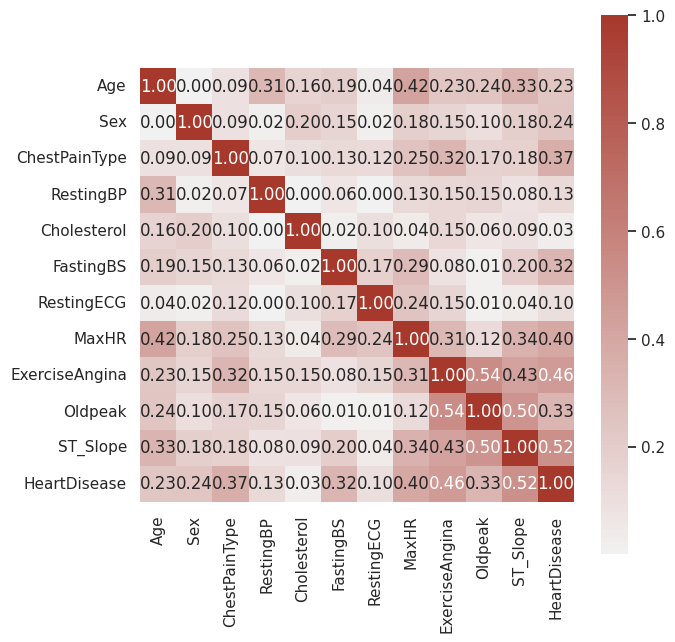

In [35]:
plt.figure(figsize=(7,7))
corr_matrix = train_val_split.corr().abs()
# Create a custom diverging palette: https://towardsdatascience.com/how-to-use-pairwise-correlation-for-robust-feature-selection-20a60ef7d10
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
sns.heatmap(corr_matrix, annot=True, center=0, 
                fmt='.2f', square=True, cmap=cmap)

#Pairwise correlation matrix
#MaxHr neg correlation to Heart disease! oldpeak correlates alot with HeartDisease

plt.savefig('correlationMatrix.png')
#plt.show()

In [36]:
y_train = train_val_split["HeartDisease"] #.to_numpy()
X_train = train_val_split.drop(columns=["HeartDisease"])
y_test = test_split["HeartDisease"] #.to_numpy()
X_test = test_split.drop(columns=["HeartDisease"])
#X = data.to_numpy()
#display(X)
#display(y)

##Q2: Logistic Lasso Regression (5 Pts)
By design, linear models are interpretable due to the weights that intuitively provide feature importance values. Further, we can perform l1 regularization to sparsify weights, allowing us to understand which features do not contribute to the outcome. For this question, fit a Lasso regression model with l1 regularization on the dataset. What preprocessing step is crucial to ensure comparability of feature coefficients? Provide performance metrics such as f1-score or balanced accuracy to quantify the performance of this model. Visualize the importance of the different features and present how they contribute to the model's output. Finally, argue for or against fitting a logistic regression using only the important variables, as determined by the Lasso model, to arrive at the final coefficients instead of keeping the coefficients of the Lasso model.


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import balanced_accuracy_score

log = LogisticRegression(penalty='l1', solver='liblinear')
model = log.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score for Logistic Regression for test set is ", balanced_accuracy_score(y_test, y_pred))

Accuracy score for Logistic Regression for test set is  0.8305896805896806


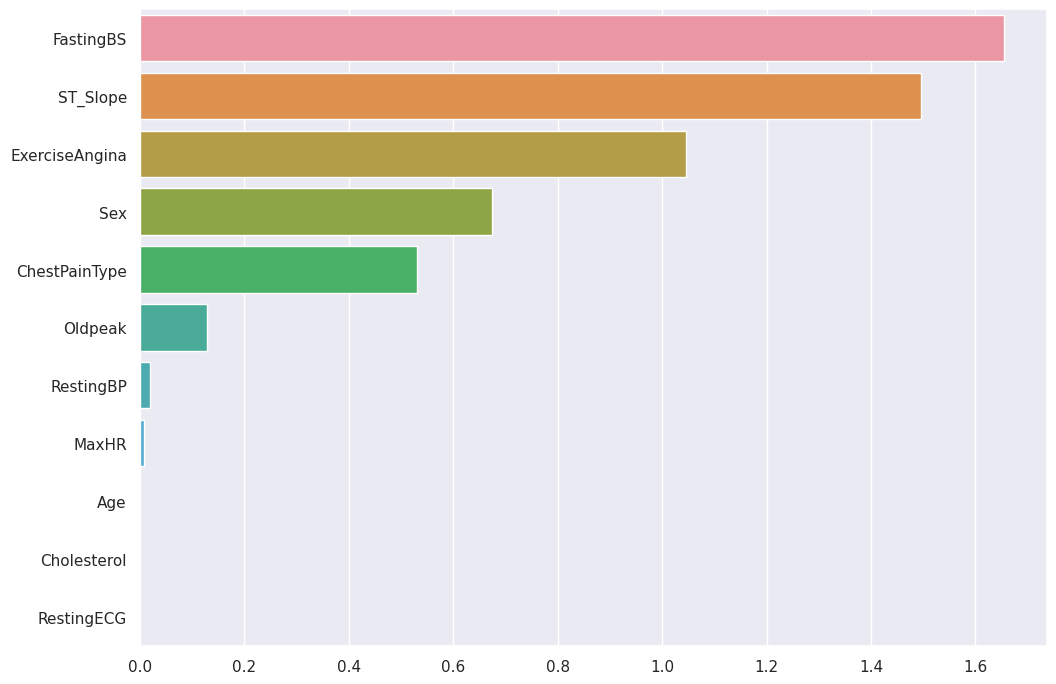

In [38]:
coef = np.abs(model.coef_[-1])
# Sort the feature coefficients from greatest to least using the sorted indices
sorted_indices = coef.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_coef = coef[sorted_indices]

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x= sorted_coef, y= sorted_feature_names)
plt.savefig("LogLassoRegFeatureSelection")

Removed the columns where Logistic Lasso Regression set the coefficients to smaller than 0.01 (->0)

In [39]:
#https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a
dropcol = np.abs(model.coef_).round(decimals=2).reshape(-1)
dropcolnames = X_train.columns[dropcol < 0.01]
print("Dropped columns", dropcolnames)
#some features are close to 0, we will discard them:
new_X_train = X_train.drop(columns=dropcolnames)
print(new_X_train.head())
#remove those by test_features too:
new_X_test = X_test.drop(columns=dropcolnames)

Dropped columns Index(['Age', 'Cholesterol', 'RestingECG'], dtype='object')
   Sex  ChestPainType  RestingBP  FastingBS  MaxHR  ExerciseAngina  Oldpeak  \
0    1              0        145          0    142               1      2.8   
1    1              0        160          1     98               1      2.0   
2    0              0        150          0    154               1      1.4   
3    1              0        164          1     90               0      1.0   
4    1              0        128          1    148               1      1.0   

   ST_Slope  
0         1  
1         1  
2         1  
3         1  
4         1  


Logistic Lasso Regression on the smaller dataset with only the important features.

In [40]:
modelnew = log.fit(new_X_train, y_train)
y_pred_new = modelnew.predict(new_X_test)
print("Accuracy score for Logistic Regression for test set is ", balanced_accuracy_score(y_test, y_pred_new))

Accuracy score for Logistic Regression for test set is  0.8305896805896806


Accuracy score is very similar, so do not need these unimportant features.

In [41]:
#X_train = new_X_train
#X_test = new_X_test

#Decision Trees


##Q3: Decision Trees (3 Pts)
Like linear models, decision trees are intrinsically interpretable models by nature. For a given output, we can retrace every decision that led to the final prediction by following the path of a sample along the edges of the tree. Further, the models' impurity measure allows us to quantify feature importance within the dataset. As in the previous question, train a decision tree on the dataset and report classification performance on the test set. Visualize the influence of the different features according to the Gini importance.

Decision Tree


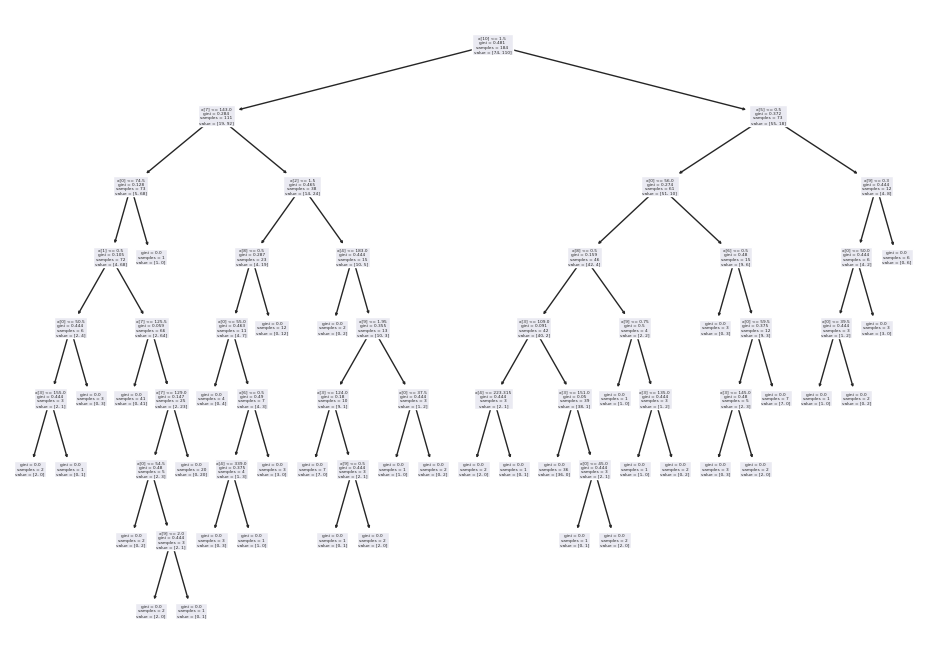

In [42]:
from sklearn import tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets 

clf = tree.DecisionTreeClassifier(criterion ="gini")
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
tree.plot_tree(clf)
print("Decision Tree")

Accuracy score for Decision Tree for test set  1.0


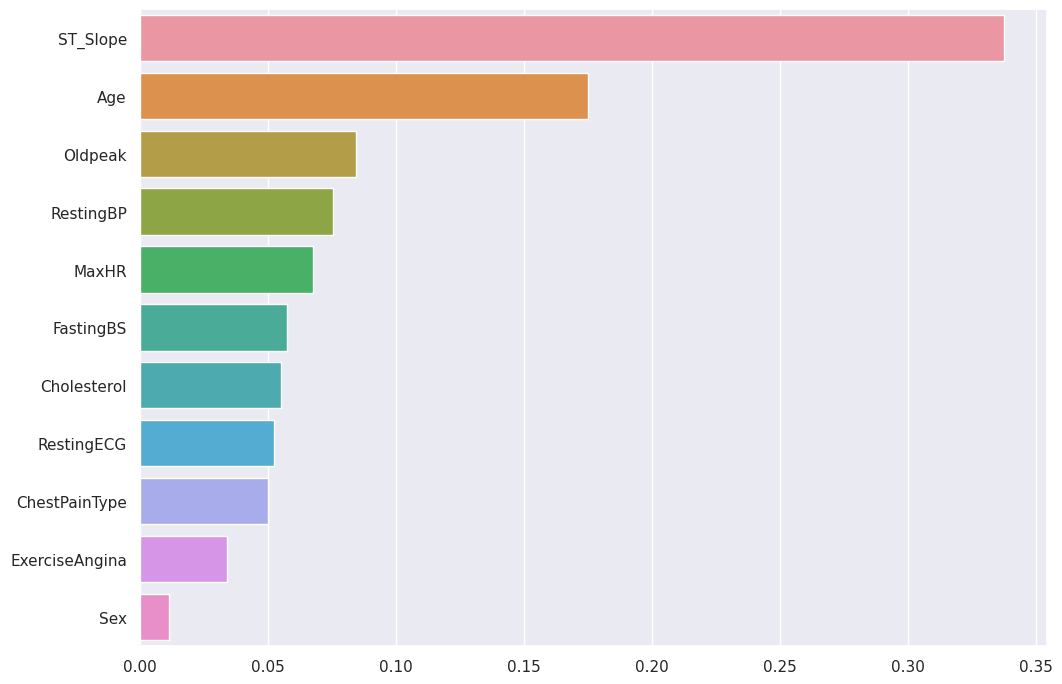

In [43]:
#print(accuracy_score(y_test, y_pred))
print("Accuracy score for Decision Tree for test set ", clf.score(X_test, y_test))

feature_importances = clf.feature_importances_
#print("feature importances", feature_importances)
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x= sorted_importances, y= sorted_feature_names)
plt.savefig("DecisionTreeFeatureImportances")

##Q4: Multi-Layer Perceptrons(7 Pts)
While often reaching superior performance, MLPs are generally hard to interpret, and it is not straightforward to see what is happening within these models. We thus opt for post-hoc explainability methods such as SHAP1. Post-hoc explainability methods typically use some procedure during inference to find the feature importance per sample. Similar to Q2 and Q3, implement a simple MLP, train it on the dataset, and report test set performance. Make sure to report the architecture and optimization procedure you used for training.
Further, visualize SHAP explanations of the outputs of four positive and negative samples and feature importances of the overall model. Are feature importances consistent across different predictions and compared to overall importance values? Elaborate on your findings!
Hint: There is an excellent SHAP library for python that provides many SHAP algorithms and visualizations out of the box.

In [63]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
#print(clf.predict_proba(X_test[:1]))
print("Accuracy of MLP is ", clf.score(X_test, y_test))


Accuracy of MLP is  0.9293478260869565


In [119]:
!pip install shap
!pip install shap --upgrade
import shap

X100 = shap.utils.sample(X_test, 100) # 100 instances for use as the background distribution
# compute the SHAP values for the linear model
explainer = shap.Explainer(clf.predict, X100)
shap_values = explainer(X_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Permutation explainer: 185it [00:23,  3.58it/s]


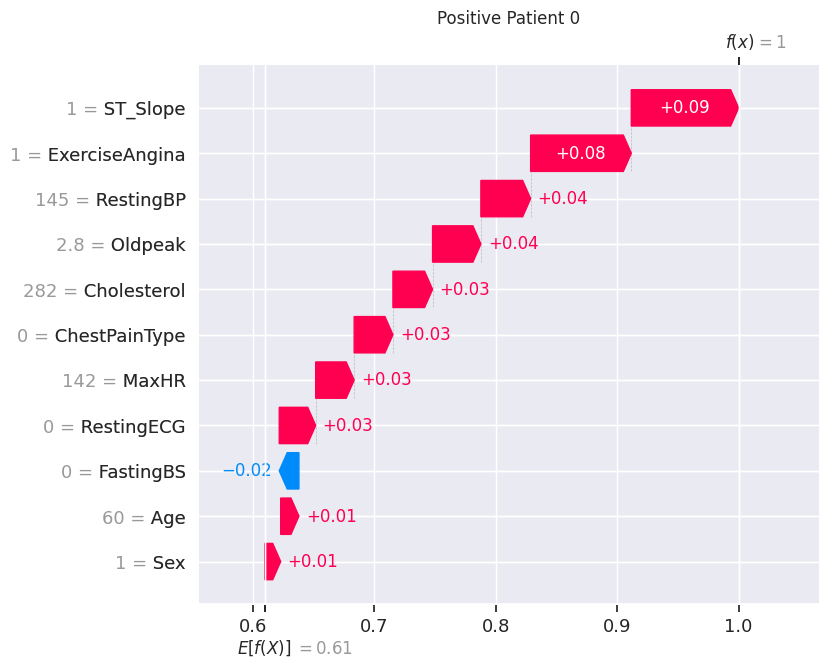

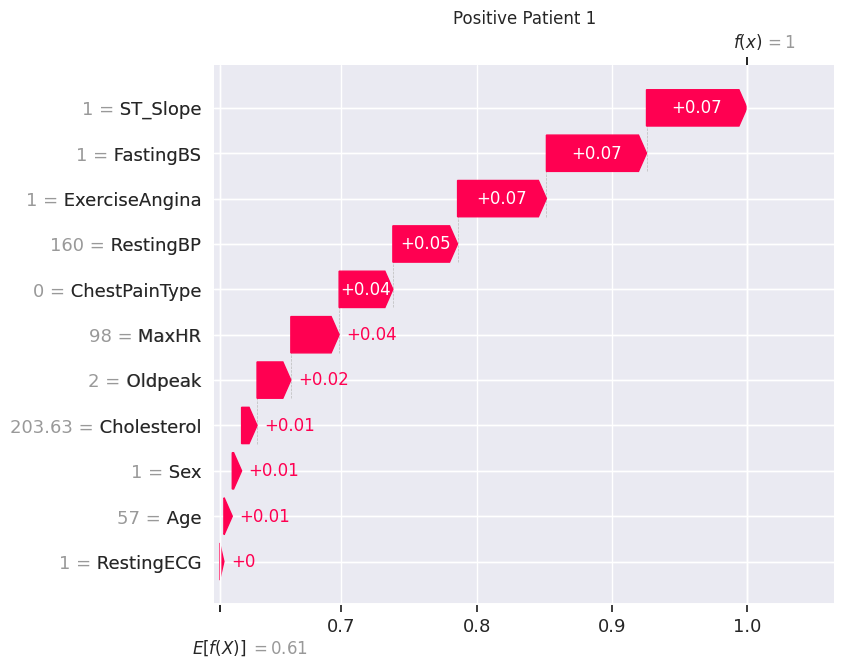

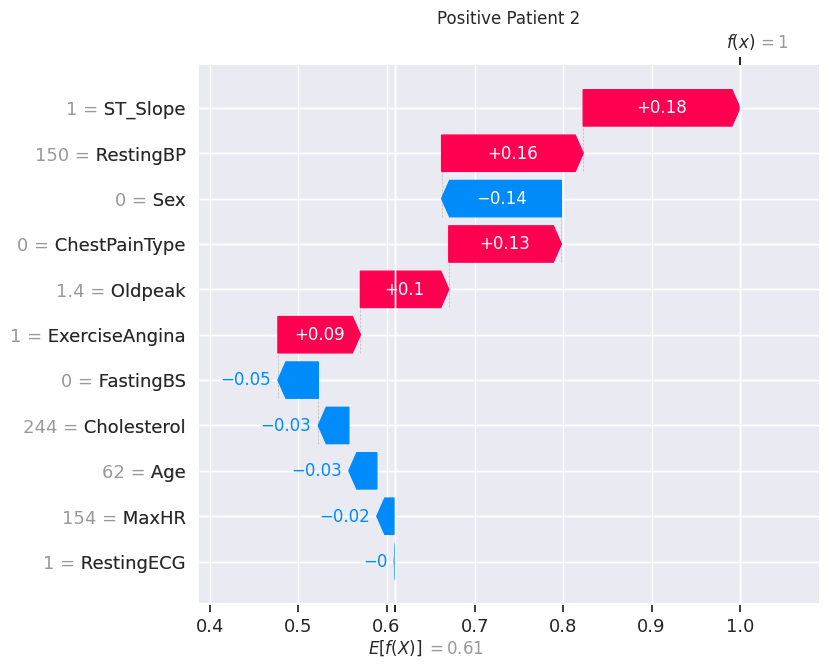

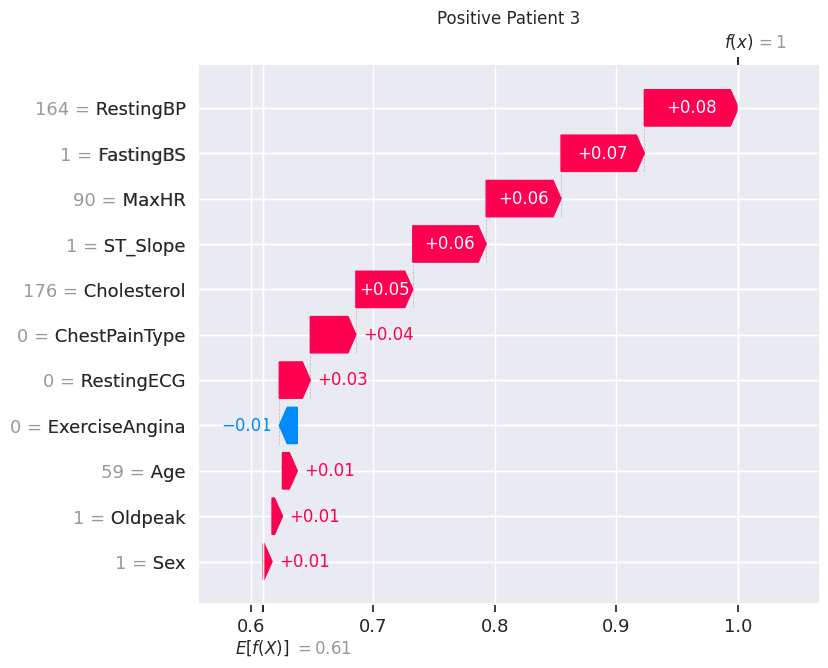

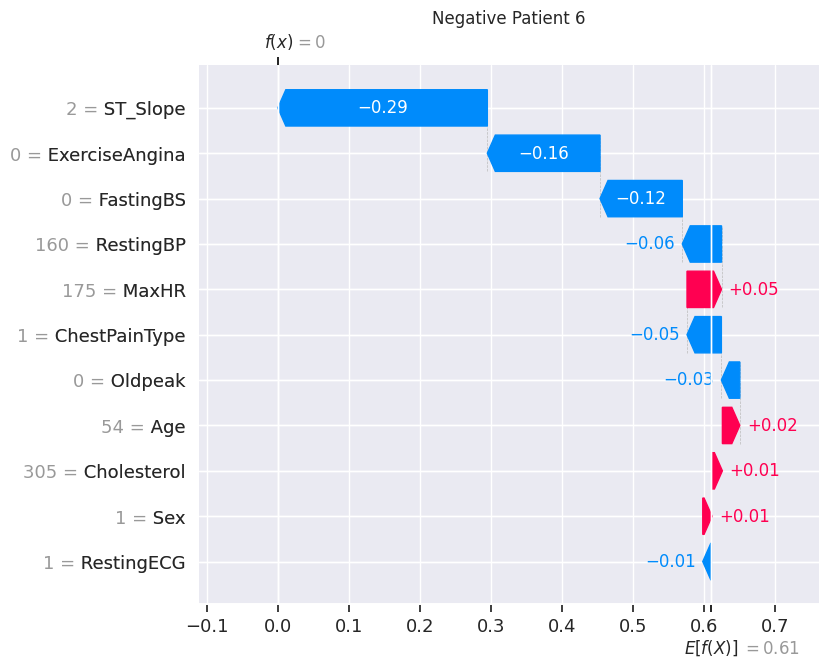

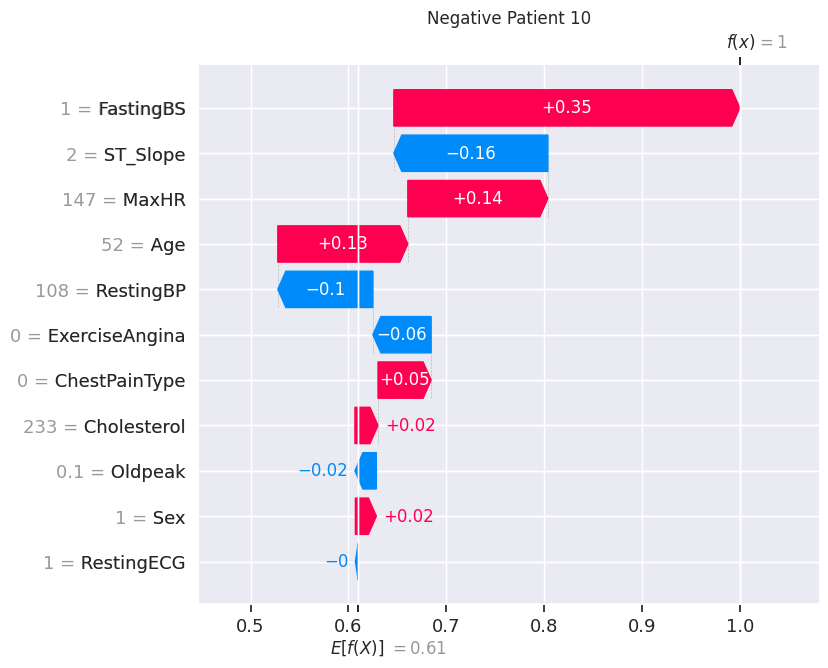

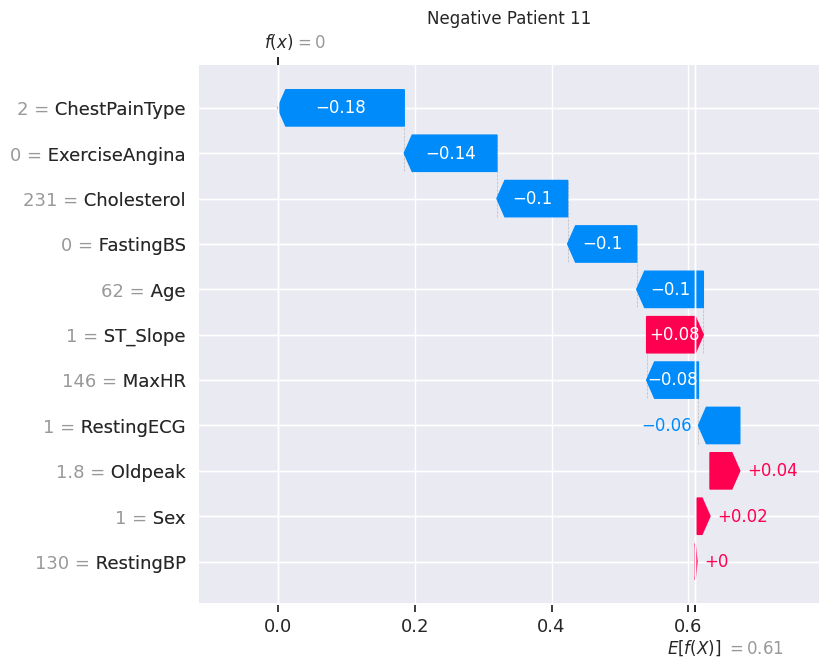

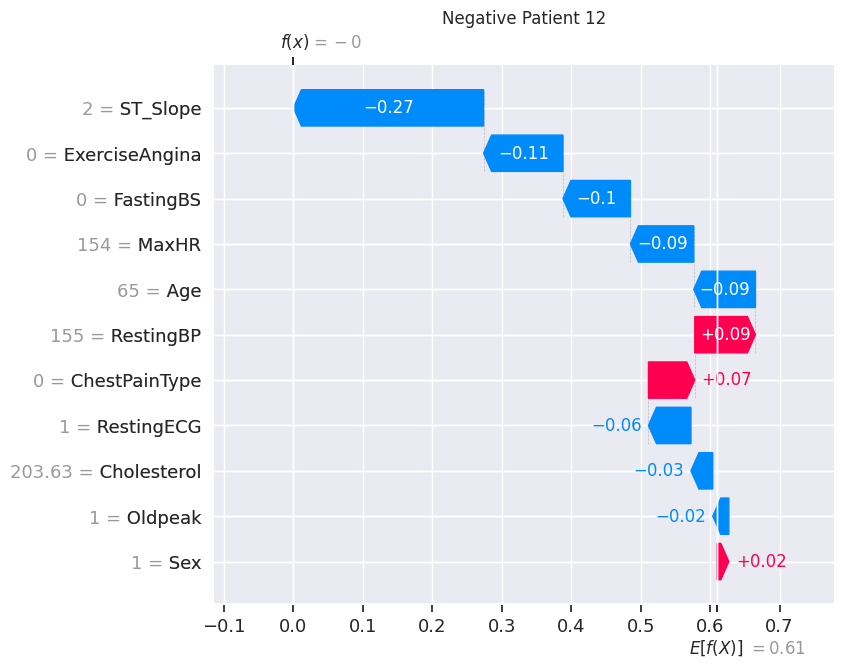

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


In [122]:
sample_in_pos =[0,1,2,3]
sample_in_neg =[6,10,11,12] # for which patient we should see how the input gets changed to produce the prediction 

#plt.title(("Patient ", 0, "with Heart Disease"))
for i in sample_in_pos:
  plt.title("Positive Patient {}".format(i))
  shap.plots.waterfall(shap_values[i], max_display=14, show=False)
  plt.savefig("Poshappat_{}.png".format(i))
  plt.show()
  plt.clf()
for i in sample_in_neg:
  plt.title("Negative Patient {}".format(i))
  shap.plots.waterfall(shap_values[i], max_display=14, show=False)
  plt.savefig("Negshappat_{}.png".format(i))
  plt.show()
  plt.clf()
plt.title("Summary of MLP Shap Importances")
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type='bar', show=False)
plt.savefig("SummaryMLPShapImportances")
plt.show()
plt.clf()
shap.plots.beeswarm(shap_values, show=False)
plt.savefig("Beeswarm")
plt.show()
plt.clf()
#feature importance seems to change for each person

##Challenge 1: Neural Additive Models2 (10 Pts)
Another way to make deep models more interpretable is by careful design of the architecture. One example of such a model is the Neural Additive Model (NAM), which is an instance of the
1 Lundberg and Lee, “A Unified Approach to Interpreting Model Predictions.” 2 Agarwal et al., “Neural Additive Models.”
  
class of Generalized Additive Models3 (GAM). Read the paper about NAMs, implement the model, and train it on the dataset. Like Q2-4, provide performance metrics on the test set. Similar to Q4, visualize the feature importances of four positive and four negative samples. Are the feature importances similar for different samples? Do the feature importances found with NAMs differ from the ones in Q2-4, or are they consistently the same? Conceptually, how does the model compare to Logistic Regression and MLPs? Why are NAMs more interpretable than MLPs despite being based on non-linear neural networks?
